In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stat
header_row = 0

In [56]:
offense_stats = pd.read_csv('offense_stats.csv')
defense_stats = pd.read_csv('defense_stats.csv')
passing_stats = pd.read_csv('passing_stats.csv')
passdef_stats = pd.read_csv('passdef_stats.csv')
rushing_stats = pd.read_csv('rushing_stats.csv')
rushdef_stats = pd.read_csv('rushdef_stats.csv')

In [57]:
offense_stats.columns = offense_stats.iloc[header_row]
offense_stats = offense_stats.drop(header_row)

defense_stats.columns = defense_stats.iloc[header_row]
defense_stats = defense_stats.drop(header_row)

<AxesSubplot:xlabel='Y/A', ylabel='Y/P'>

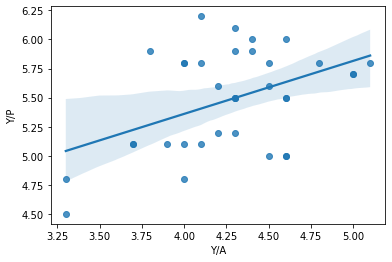

In [58]:
offense_stats.dropna()
offense_stats = offense_stats.loc[offense_stats['G'] != np.NaN]
sns.regplot(x = offense_stats['Y/A'].astype(float), y = offense_stats['Y/P'].astype(float))

<AxesSubplot:xlabel='Y/A', ylabel='Y/P'>

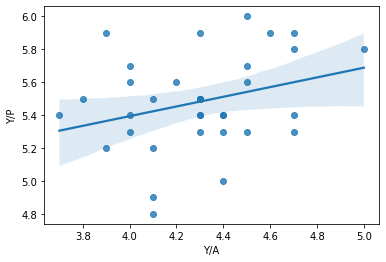

In [59]:
defense_stats.dropna()
sns.regplot(x = defense_stats['Y/A'].astype(float), y = defense_stats['Y/P'].astype(float))

In [60]:
passing_stats.dropna()
#passing_stats_w_kupp = passing_stats
#passing_stats_w_kupp.loc[35] = [0.0, 'Cooper Kupp', 13.0, np.NaN, 151, 74.8, 1489.0, 12, np.NaN, np.NaN, np.NaN, 59.0, 9.9, 9.9, 13.2, 114.5, 8.7, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
kupp_yds = 1489.0
kupp_df = passing_stats.loc[passing_stats['Yds'] < 1.75 * kupp_yds]
kupp_df

,Rk,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,...,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,EXP
27,28.0,Jacksonville Jaguars,13.0,273.0,468.0,58.3,2605.0,9.0,1.9,14.0,...,200.4,69.3,25.0,163.0,5.1,5.30,4.4,1.0,2.0,-19.98
28,29.0,New Orleans Saints,13.0,235.0,405.0,58.0,2573.0,25.0,6.2,11.0,...,197.9,88.0,24.0,175.0,5.6,6.00,6.0,1.0,2.0,23.18
29,30.0,Philadelphia Eagles,13.0,233.0,379.0,61.5,2551.0,15.0,4.0,8.0,...,196.2,87.3,23.0,137.0,5.7,6.30,6.2,1.0,1.0,42.74
30,31.0,Houston Texans,13.0,270.0,424.0,63.7,2428.0,13.0,3.1,13.0,...,186.8,79.2,37.0,277.0,8.0,5.30,4.6,NaN,NaN,-44.14
31,32.0,Chicago Bears,13.0,231.0,384.0,60.2,2295.0,12.0,3.1,16.0,...,176.5,73.5,42.0,307.0,9.9,5.40,4.3,1.0,1.0,-38.98
34,NaN,Avg Tm/G,NaN,22.7,34.8,65.1,234.5,1.6,4.5,0.8,...,234.5,91.3,2.3,15.7,6.1,6.32,6.2,NaN,NaN,NaN


We can tell that if we multiply the leading reciever Cooper Kupp's stats alone by 1.75, he would have more yards than 5 entire NFL teams. 

<AxesSubplot:xlabel='Cmp', ylabel='Y/G'>

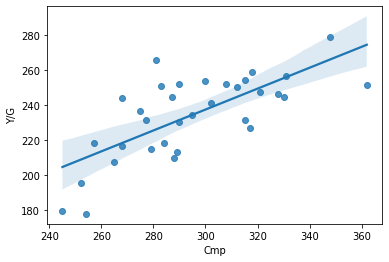

In [61]:
passdef_stats.dropna()
passdef_stats = passdef_stats.loc[passdef_stats['Cmp'] < 1000]
passdef_stats = passdef_stats.loc[passdef_stats['Cmp'] > 100]
sns.regplot(x = passdef_stats['Cmp'].astype(float), y = passdef_stats['Y/G'].astype(float))


In [62]:
rushing_stats.dropna()
#rushing_stats_w_jt = rushing_stats
#rushing_stats_w_jt.loc[35] = [0.0, 'Jonathan Taylor', 13.0, 241.0, 1348.0, 16.0, 83.0, 5.6, 103.7, 4.0, np.NaN]
jt_df = rushing_stats.loc[rushing_stats['Yds'] < 1348]
jt_df

,Rk,Tm,G,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,EXP
22,23.0,Jacksonville Jaguars,13.0,288.0,1335.0,11.0,66.0,4.6,102.7,19.0,-13.88
23,24.0,Los Angeles Rams,13.0,311.0,1264.0,8.0,29.0,4.1,97.2,10.0,-13.92
24,25.0,Tampa Bay Buccaneers,13.0,292.0,1248.0,14.0,47.0,4.3,96.0,11.0,26.93
25,26.0,New York Giants,13.0,303.0,1225.0,8.0,46.0,4.0,94.2,16.0,-9.07
26,27.0,Atlanta Falcons,13.0,318.0,1184.0,8.0,39.0,3.7,91.1,18.0,-33.00
27,28.0,Pittsburgh Steelers,13.0,308.0,1149.0,8.0,26.0,3.7,88.4,15.0,-14.45
28,29.0,Las Vegas Raiders,13.0,288.0,1100.0,11.0,31.0,3.8,84.6,18.0,-37.02
29,30.0,New York Jets,13.0,277.0,1094.0,9.0,39.0,3.9,84.2,11.0,1.50
30,31.0,Miami Dolphins,13.0,311.0,1030.0,9.0,24.0,3.3,79.2,22.0,-34.71
31,32.0,Houston Texans,13.0,310.0,1008.0,6.0,35.0,3.3,77.5,16.0,-53.24


From this analysis, we can conclude that the Jags, Rams, Bucs, Giants, Falcons, Steelers, Raiders, Jets, Dolphins, and Texans have less total rush yards than Jonathan Taylor alone.

<AxesSubplot:xlabel='Att', ylabel='Y/G'>

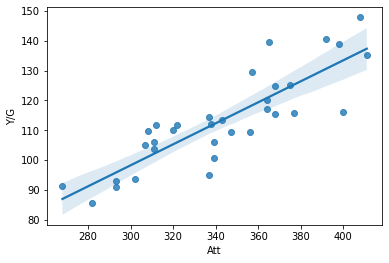

In [63]:
rushdef_stats.dropna()
rushdef_stats = rushdef_stats.loc[rushdef_stats['Att'] < 1000]
rushdef_stats = rushdef_stats.loc[rushdef_stats['Att'] > 100]
sns.regplot(x = rushdef_stats['Att'].astype(float), y = rushdef_stats['Y/G'].astype(float))

<AxesSubplot:xlabel='Att', ylabel='Att'>

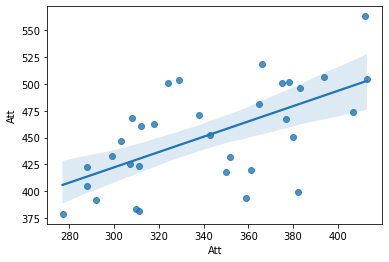

In [64]:
passing_stats2 = passing_stats.loc[passing_stats['Att'] < 2000]
rushing_stats2 = rushing_stats.loc[rushing_stats['Att'] < 2000]
passing_stats2 = passing_stats2.loc[passing_stats2['Att'] > 100]
rushing_stats2 = rushing_stats2.loc[rushing_stats2['Att'] > 100]
sns.regplot(x = rushing_stats2['Att'].astype(float), y = passing_stats2['Att'].astype(float))

In [73]:
df = pd.read_csv('week15matchups.csv')
df.head()

,Away,Home,AwayTD,HomeTD
0,Kansas City Chiefs,Los Angeles Chargers,12,12
1,Las Vegas Raiders,Cleveland Browns,11,17
2,New England Patriots,Indianapolis Colts,15,20
3,Dallas Cowboys,New York Giants,11,8
4,Arizona Cardinals,Detroit Lions,21,9


In [77]:
td_df = pd.concat([df[['Home','Away','HomeTD']].assign(home=1).rename(
            columns={'Home':'team', 'Away':'opponent','HomeTD':'tds'}),
           df[['Away','Home','AwayTD']].assign(home=0).rename(
            columns={'Away':'team', 'Home':'opponent','AwayTD':'tds'})])

td_df

,team,opponent,tds,home
0,Los Angeles Chargers,Kansas City Chiefs,12,1
1,Cleveland Browns,Las Vegas Raiders,17,1
2,Indianapolis Colts,New England Patriots,20,1
3,New York Giants,Dallas Cowboys,8,1
4,Detroit Lions,Arizona Cardinals,9,1
5,Philadelphia Eagles,Washington Football Team,19,1
6,Buffalo Bills,Carolina Panthers,13,1
7,Pittsburgh Steelers,Tennessee Titans,8,1
8,Jacksonville Jaguars,Houston Texans,11,1
9,Miami Dolphins,New York Jets,9,1
